# Segmentarea imaginilor color

In [12]:
import cv2 
import os
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../_PyUtilFcts/')
import ColorSpaceFunctions as clsFcts
import SingleCompHistoThd as schThd

In [13]:
# Functie pentru a citi si afisa imaginea dintr-un fisier 
def CitireAfisareImagine(imgFile):
    print('\n   ----- INFO - Imaginea selectata -----\n')      
    print("Imaginea originala, din fisierul :", imgFile)

    imgBGR = cv2.imread(imgFile) 
    imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB) 
    print("         Shape:" , imgRGB.shape,", Type :" , imgRGB.dtype)
    fig = plt.figure(figsize=(10,10)); plt.imshow(imgRGB); plt.show()
    return imgRGB


   ----- INFO - Imaginea selectata -----

Imaginea originala, din fisierul : /Users/galoscar07/Documents/master2k20-2k22/2nd Semester/SIAI/Laborator/_TestImages/ImgTstSegmBoard/board3.bmp
         Shape: (162, 466, 3) , Type : uint8


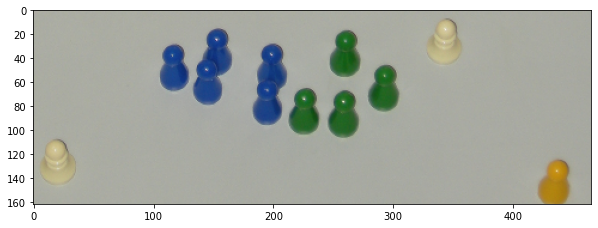

In [14]:
# Selectare imagine pe care testam aplicatia
# Se recomanda sa se pastreze imgsPath = "D:/_TestImages" - fiind directorul 
#       principal care contine subdirectoarele cu imaginile sugerate
# La setare imgName se specifica si subdirectorul din care dace parte imaginea
imgsPath = "/Users/galoscar07/Documents/master2k20-2k22/2nd Semester/SIAI/Laborator/_TestImages" 
imgName = 'ImgTstSegmBoard/board3.bmp' # atentie sa fie scris corect numele imaginii!!!!
imgFile = os.path.sep.join([imgsPath, imgName])
#imgName = 'Kodak/kodim23.png'
# Sugestie imagini pentru testare (dir/ imgs):
#  ImgTstSegmGen: kronenburg-rose-closeup.jpg; roses.jpg; rose021.jpg
#  ImgTstSegmFaciale: la alegere 5 imagini - scop: segmentare zona piele intr-o singura clasa
#  ImgTstSegmBoard:   board3.bmp; board7.bmp; - scop: segmentare pioni dupa culoare 

imgRGB = CitireAfisareImagine(imgFile)

In [15]:
def ConversieAfisareImgColorSpace(imgRGB, SelClrSp):
    NewClrSp = ColorSpacesList[SelClrSp] 
    OrgClrSp = ColorSpacesList[0] # 0 - pentru RGB - imaginea la deschidere este RGB
    print('\n  ----- INFO - In[2] Conversie Spatiu de Culoare, din ' + OrgClrSp + ' in '+ NewClrSp)
    ImgClrSp = clsFcts.ConvertColorSpace(imgRGB, OrgClrSp , NewClrSp)

    clsFcts.plotColorComponents(ImgClrSp, NewClrSp)
    clsFcts.plotColorHistograms(ImgClrSp, NewClrSp)
    clsFcts.plot3DcolorSpace(ImgClrSp, imgRGB, NewClrSp)
    return ImgClrSp


  ----- INFO - In[2] Conversie Spatiu de Culoare, din R/G/B in H/S/V


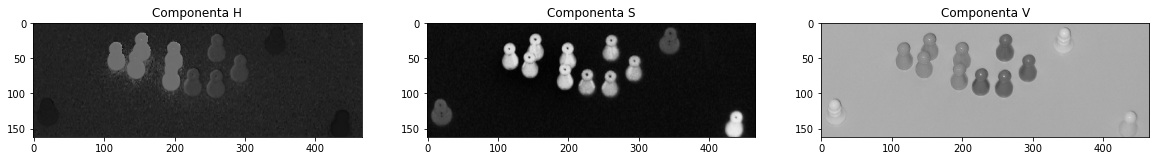

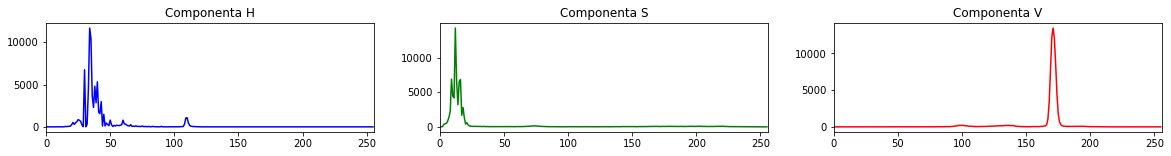


 Afisare Cub Culori in spatiu de culoare:  H/S/V

 Numar culori unice care apar in imagine:  9917 din 2^24( 16777216 ) ; procent:  0.06 % acoperire cub


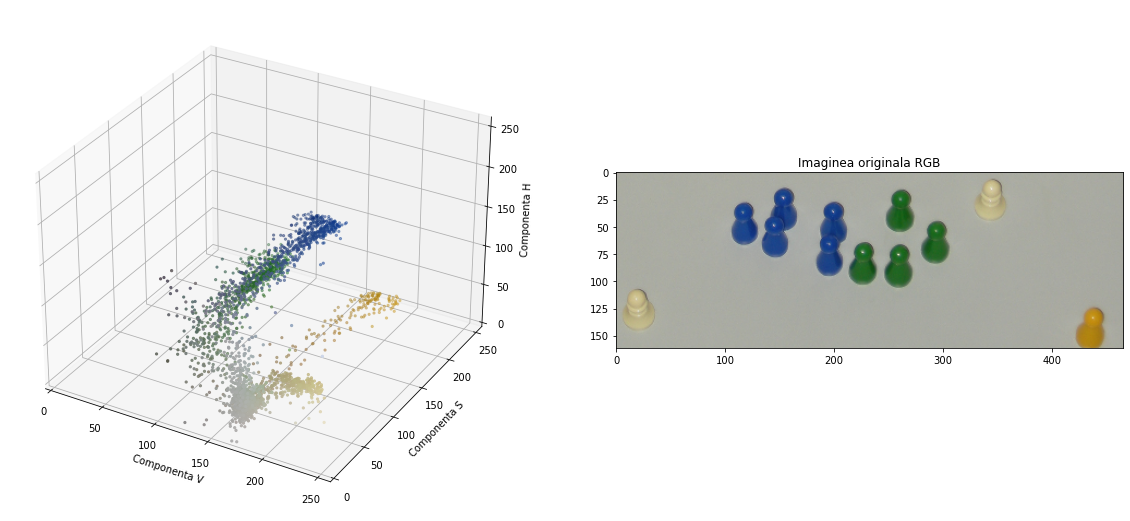

In [17]:

ColorSpacesList = ['R/G/B', 'Y/Cr/Cb', 'H/S/V', 'L/a/b', 'gray'] 

# Selectie spatiu de culoare in care se realizeaza operatia
#   Se selecteaza ca si o pozitie din vectorul ColorSpacesList
#   ColorSpacesList = ['RGB', 'YCrCb', 'HSV', 'Lab', 'gray']
#       0 - 'RGB' (nu se alege pentru a fi spatiu in care realizam procesarea), 
#       1 - 'YCrCb',      2 - 'HSV',           3 - 'Lab'
SelClrSp = 2 # se selecteaza ca si o pozitie din vectorul ColorSpacesList

ImgClrSp = ConversieAfisareImgColorSpace(imgRGB, SelClrSp)

In [18]:
# Selectie componenta pentru procesare 
#       se alege 0 pentru C0, 1 pentru C1 sau 2 pentru C2
# exemplu: YCbCr - 0=Y, 1=Cb, 2=Cr; HSV - 0=H, 1=S, 2=V; Lab - 0=L, 1=a, 2=b 
# Componenta Y, V sau L - sunt echivalentul imaginii pe nivele de gri
ClrCompNr = 0; # se alege 0, 1 sau 2 pentru - C0, C1 sau C2

CompPr = ImgClrSp[:,:,ClrCompNr]; # extragere componenta pentru procesare 



In [19]:
def SegmentareComp(CompPr,FiltWindowLen, MinMaxDif,NewClrSp ):
    print('\n  ----- INFO - In[4] Spatiu de Culoare ales pentru procesare: ', NewClrSp);
    print('\n\t\t  cu componenta pentru procesare: ', NewClrSp.split('/')[ClrCompNr] ,'\n');

    fig = plt.figure(figsize=(20,10)); 
    fig.add_subplot(121); plt.imshow(CompPr, cmap = 'gray', vmin=0, vmax=255); plt.title('Componenta procesata '); 
    fig.add_subplot(122); plt.imshow(imgRGB);plt.title('Imaginea Originala');
    plt.show()

    [LocMin,LocMax] = schThd.SingleCompHistoThd(CompPr, FiltWindowLen, MinMaxDif);
    [CpOutMax, CpOutUni] = schThd.segmMinMaxRegions(CompPr, LocMax, LocMin)
    #  =  ImOutEdge 
    OrgClrSp = ColorSpacesList[0]
    ImSegOutMax = np.zeros(ImgClrSp.shape, 'uint8') + 128; 
    ImSegOutMax[:,:,ClrCompNr] = CpOutMax;
    ImgClrSpMax = clsFcts.ConvertColorSpace(ImSegOutMax, NewClrSp, OrgClrSp)


    ImSegOutUni = np.zeros(ImgClrSp.shape, 'uint8') + 128; 
    ImSegOutUni[:,:,ClrCompNr] = CpOutUni;
    ImgClrSpUni = clsFcts.ConvertColorSpace(ImSegOutUni, NewClrSp, OrgClrSp)

    fig = plt.figure(figsize=(20,10)); 
    fig.add_subplot(121); plt.imshow(ImgClrSpMax);plt.title('Imaginea Segmentatã, etichetare prin maximul local');
    fig.add_subplot(122); plt.imshow(ImgClrSpUni);plt.title('Imaginea Segmentatã, etichetare prin intensitati/culori egal distantate');
    plt.show()


  ----- INFO - In[4] Spatiu de Culoare ales pentru procesare:  H/S/V

		  cu componenta pentru procesare:  H 



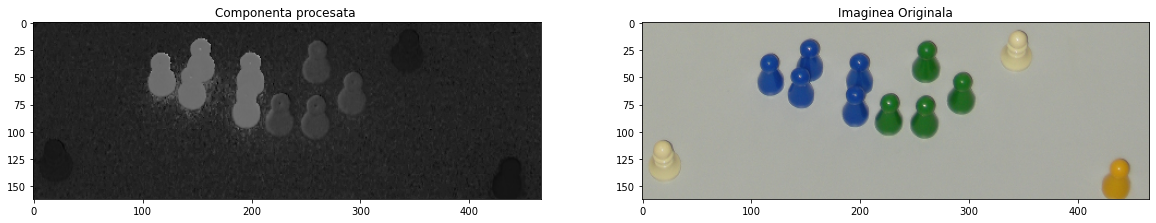

LocMax shape:  (5, 2) ;  LocMin shape:  (6, 2)


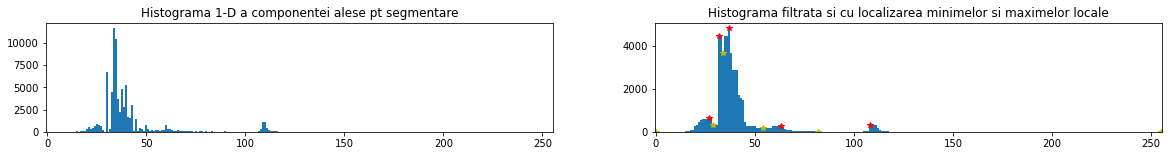

<Figure size 720x720 with 0 Axes>

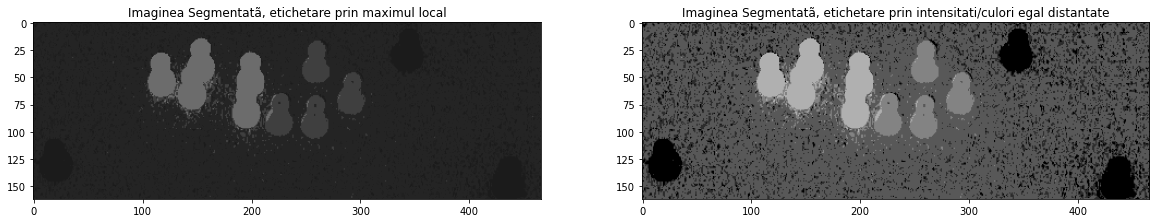

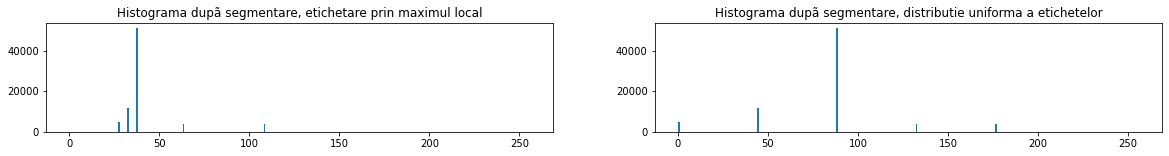

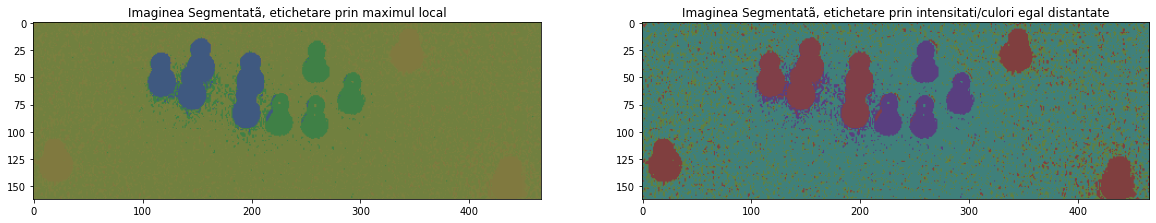

In [20]:
# Setare parametrii pentru identificare optima a minimelor si maximelor locale
# Pas 1 - netezire/filtrare histrograma pentru eliminare zgomot (salturi datorate de zgomot)
# Pas 2 - localizare minime/ maxime 
#   FiltWindowLen - pentru filtrare mediana 1D a histogramei componentei procesate
#   MinMaxDif - distanta minima acceptata intre doua minime/maxime identificate
FiltWindowLen = 7; MinMaxDif = 15;

# Daca segmentarea nu este satisfăcătoare se vor modifica parametrii:
#    FiltWindowLen, MinMaxDif (urmarind si histograma componentei 
#       si daca exista posibilitatea de imbunatatire a rezultatului sau nu)

SegmentareComp(CompPr,FiltWindowLen, MinMaxDif, ColorSpacesList[SelClrSp] )

## Concatenare instructiuni bazat pe functii


   ----- INFO - Imaginea selectata -----

Imaginea originala, din fisierul : /Users/galoscar07/Documents/master2k20-2k22/2nd Semester/SIAI/Laborator/_TestImages/ImgTstSegmGen/rose021.jpg
         Shape: (448, 617, 3) , Type : uint8


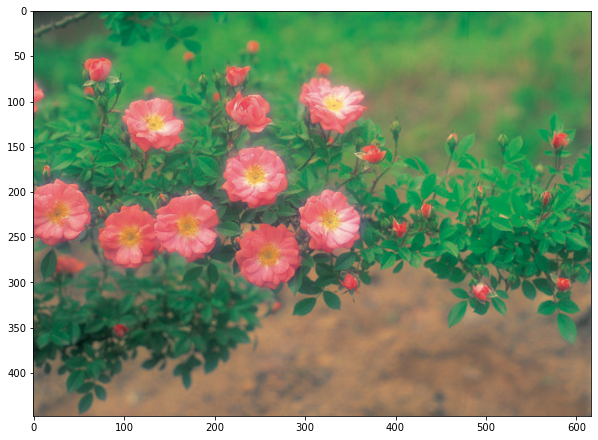


  ----- INFO - In[2] Conversie Spatiu de Culoare, din R/G/B in Y/Cr/Cb


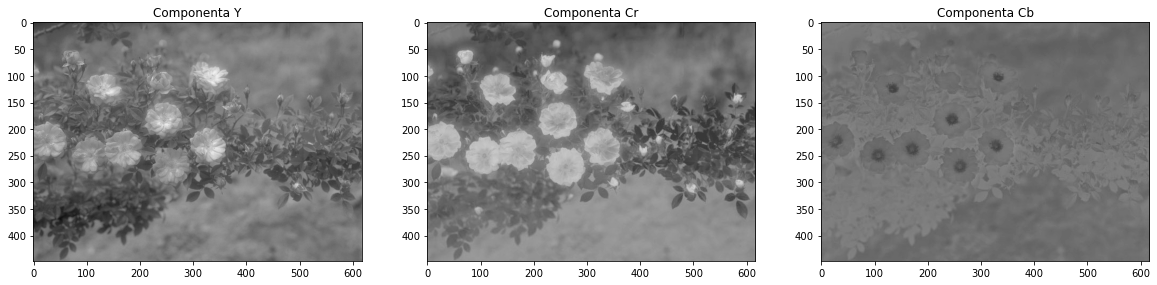

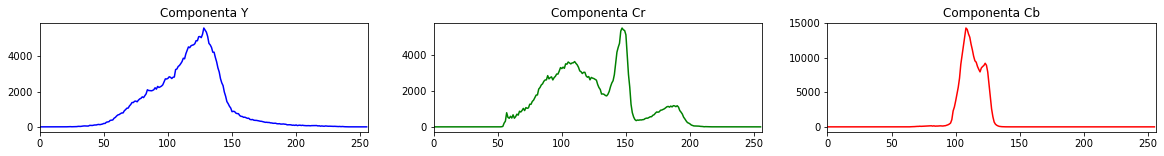


 Afisare Cub Culori in spatiu de culoare:  Y/Cr/Cb

 Numar culori unice care apar in imagine:  84656 din 2^24( 16777216 ) ; procent:  0.5 % acoperire cub


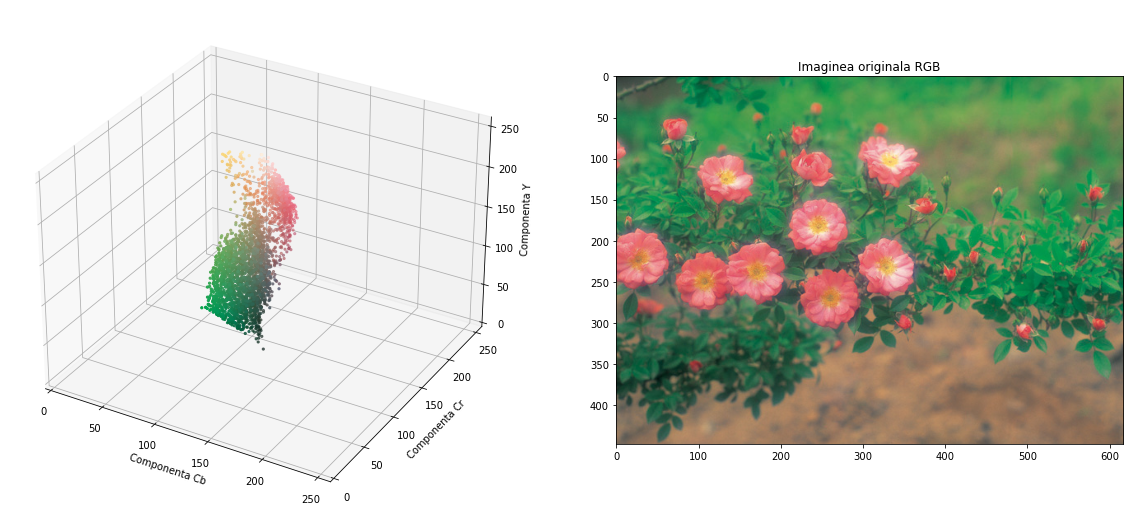


  ----- INFO - In[4] Spatiu de Culoare ales pentru procesare:  Y/Cr/Cb

		  cu componenta pentru procesare:  Cr 



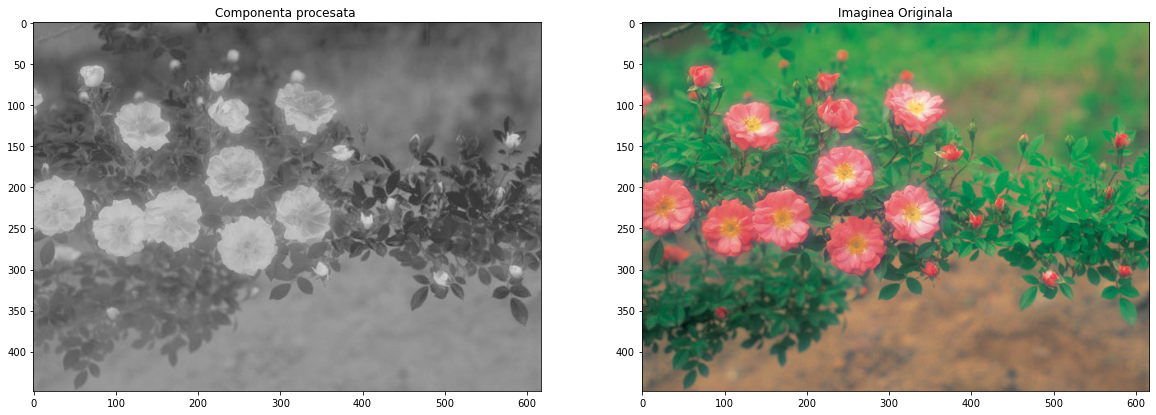

LocMax shape:  (3, 2) ;  LocMin shape:  (4, 2)


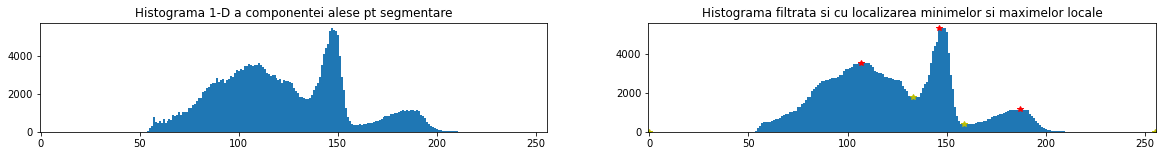

<Figure size 720x720 with 0 Axes>

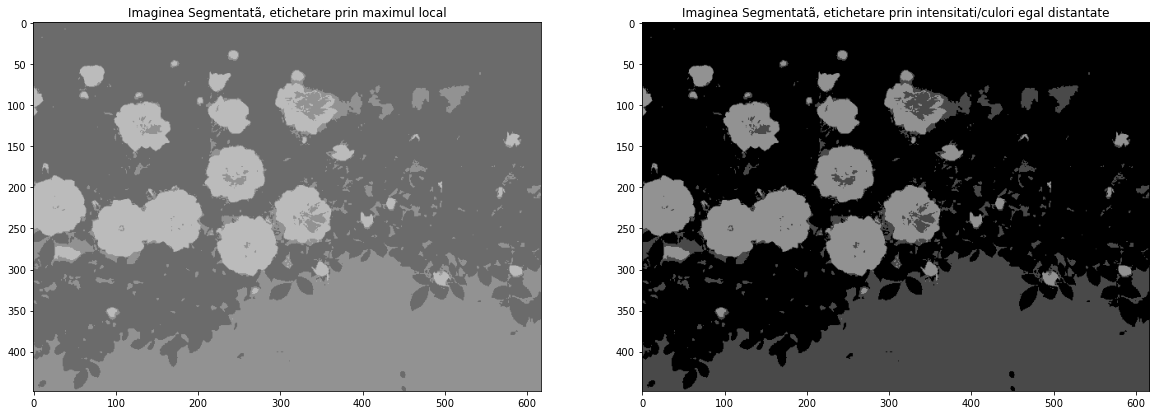

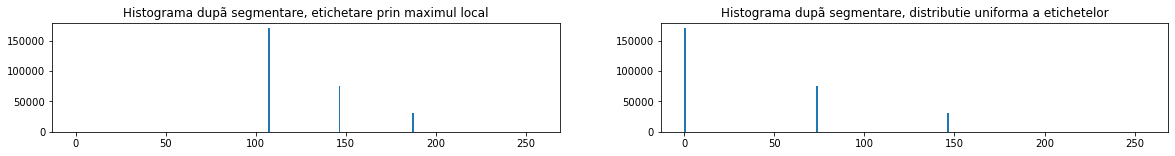

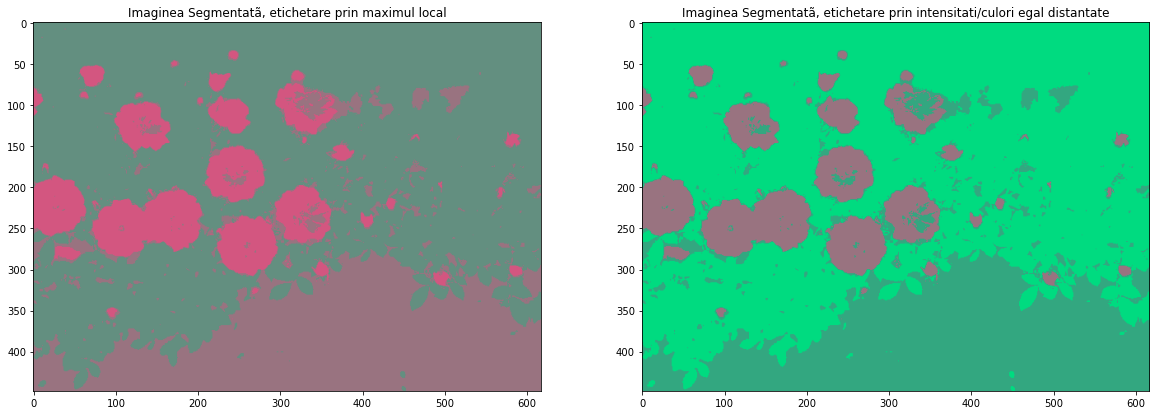

In [23]:
# Selectare imagine pe care testam aplicatia
# Se recomanda sa se pastreze imgsPath = "D:/_TestImages" - fiind directorul 
#       principal care contine subdirectoarele cu imaginile sugerate
# La setare imgName se specifica si subdirectorul din care dace parte imaginea
imgsPath = "/Users/galoscar07/Documents/master2k20-2k22/2nd Semester/SIAI/Laborator/_TestImages" 
imgName = 'ImgTstSegmGen/rose021.jpg' # atentie sa fie scris corect numele imaginii!!!!
imgFile = os.path.sep.join([imgsPath, imgName])
#imgName = 'Kodak/kodim23.png'
# Sugestie imagini pentru testare (dir/ imgs):
#  ImgTstSegmGen: kronenburg-rose-closeup.jpg; roses.jpg; rose021.jpg
#  ImgTstSegmFaciale: la alegere 5 imagini - scop: segmentare zona piele intr-o singura clasa
#  ImgTstSegmBoard:   board3.bmp; board7.bmp; - scop: segmentare pioni dupa culoare 

imgRGB = CitireAfisareImagine(imgFile)

ColorSpacesList = ['R/G/B', 'Y/Cr/Cb', 'H/S/V', 'L/a/b', 'gray'] 

# Selectie spatiu de culoare in care se realizeaza operatia
#   Se selecteaza ca si o pozitie din vectorul ColorSpacesList
#   ColorSpacesList = ['RGB', 'YCrCb', 'HSV', 'Lab', 'gray']
#       0 - 'RGB' (nu se alege pentru a fi spatiu in care realizam procesarea), 
#       1 - 'YCrCb',      2 - 'HSV',           3 - 'Lab'
SelClrSp = 1 # se selecteaza ca si o pozitie din vectorul ColorSpacesList

ImgClrSp = ConversieAfisareImgColorSpace(imgRGB, SelClrSp)

# Selectie componenta pentru procesare 
#       se alege 0 pentru C0, 1 pentru C1 sau 2 pentru C2
# exemplu: YCrCb - 0=Y, 1=Cr, 2=Cb; HSV - 0=H, 1=S, 2=V; Lab - 0=L, 1=a, 2=b 
# Componenta Y, V sau L - sunt echivalentul imaginii pe nivele de gri
ClrCompNr = 1; # se alege 0, 1 sau 2 pentru - C0, C1 sau C2

CompPr = ImgClrSp[:,:,ClrCompNr]; # extragere componenta pentru procesare 


# Setare parametrii pentru identificare optima a minimelor si maximelor locale
# Pas 1 - netezire/filtrare histrograma pentru eliminare zgomot (salturi datorate de zgomot)
# Pas 2 - localizare minime/ maxime 
#   FiltWindowLen - pentru filtrare mediana 1D a histogramei componentei procesate
#   MinMaxDif - distanta minima acceptata intre doua minime/maxime identificate
FiltWindowLen = 7; MinMaxDif = 15;

# Daca segmentarea nu este satisfăcătoare se vor modifica parametrii:
#    FiltWindowLen, MinMaxDif (urmarind si histograma componentei 
#       si daca exista posibilitatea de imbunatatire a rezultatului sau nu)

SegmentareComp(CompPr,FiltWindowLen, MinMaxDif, ColorSpacesList[SelClrSp] )



   ----- INFO - Imaginea selectata -----

Imaginea originala, din fisierul : /Users/galoscar07/Documents/master2k20-2k22/2nd Semester/SIAI/Laborator/_TestImages/ImgTstSegmFaciale/face01.jpg
         Shape: (154, 205, 3) , Type : uint8


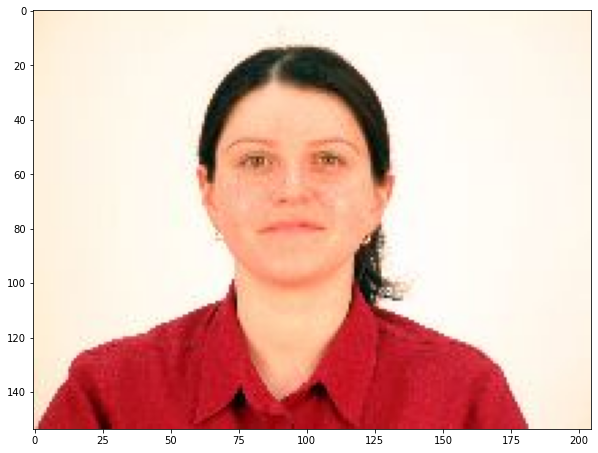


  ----- INFO - In[2] Conversie Spatiu de Culoare, din R/G/B in Y/Cr/Cb


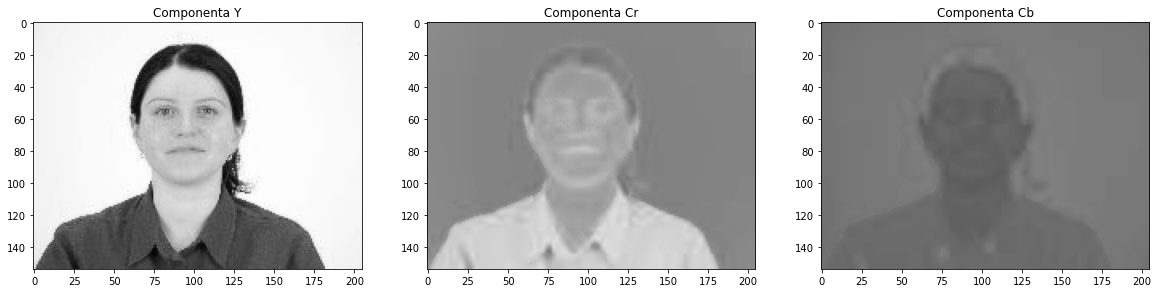

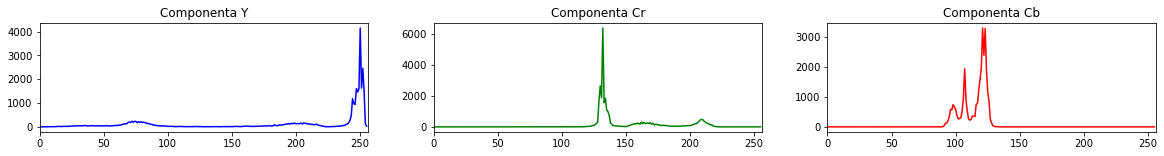


 Afisare Cub Culori in spatiu de culoare:  Y/Cr/Cb

 Numar culori unice care apar in imagine:  8087 din 2^24( 16777216 ) ; procent:  0.05 % acoperire cub


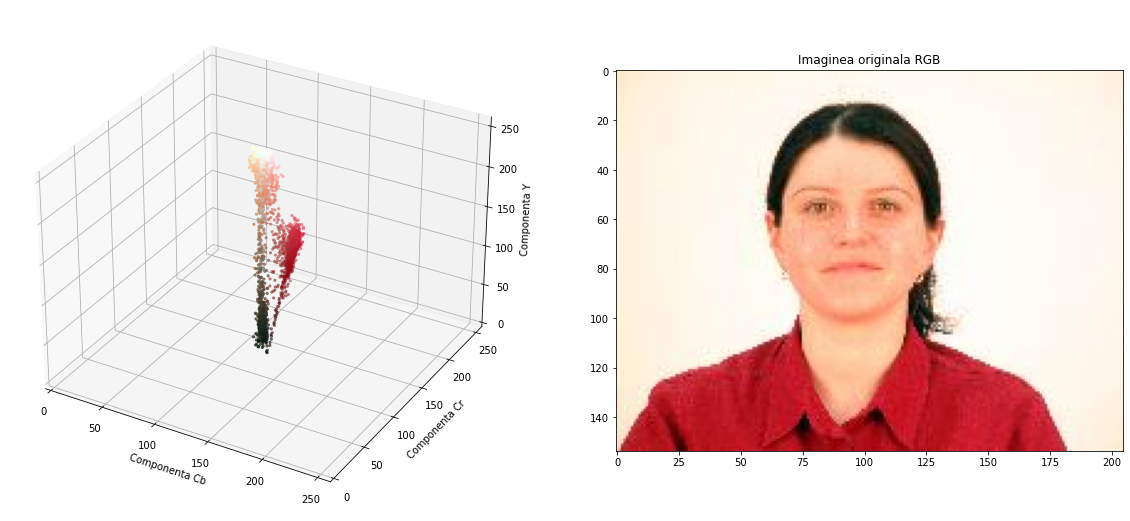


  ----- INFO - In[4] Spatiu de Culoare ales pentru procesare:  Y/Cr/Cb

		  cu componenta pentru procesare:  Cr 



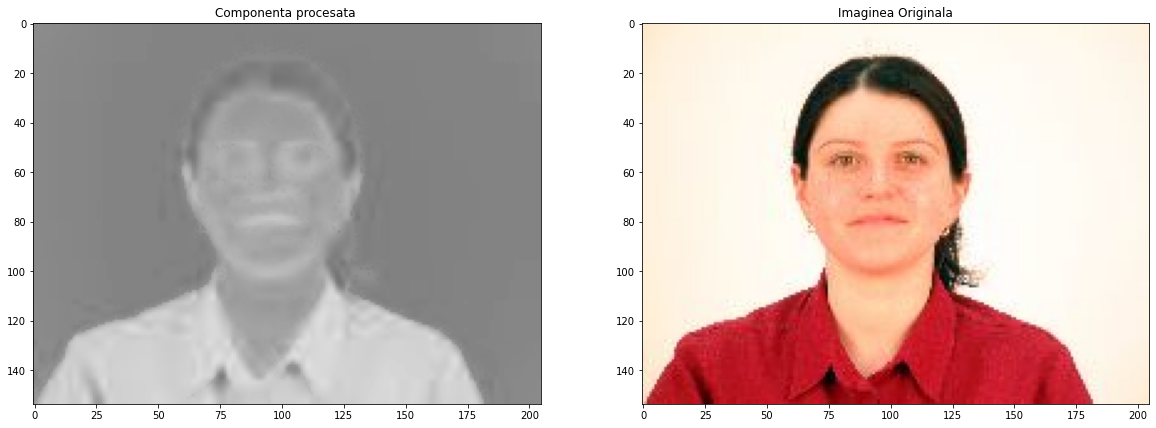

LocMax shape:  (3, 2) ;  LocMin shape:  (4, 2)


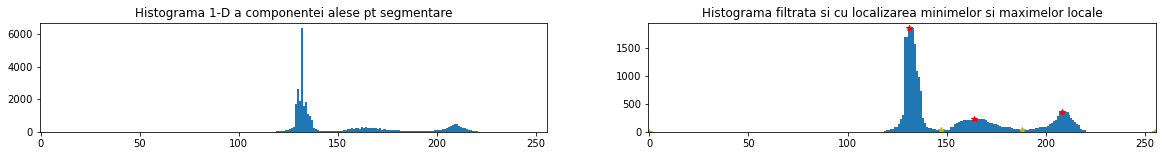

<Figure size 720x720 with 0 Axes>

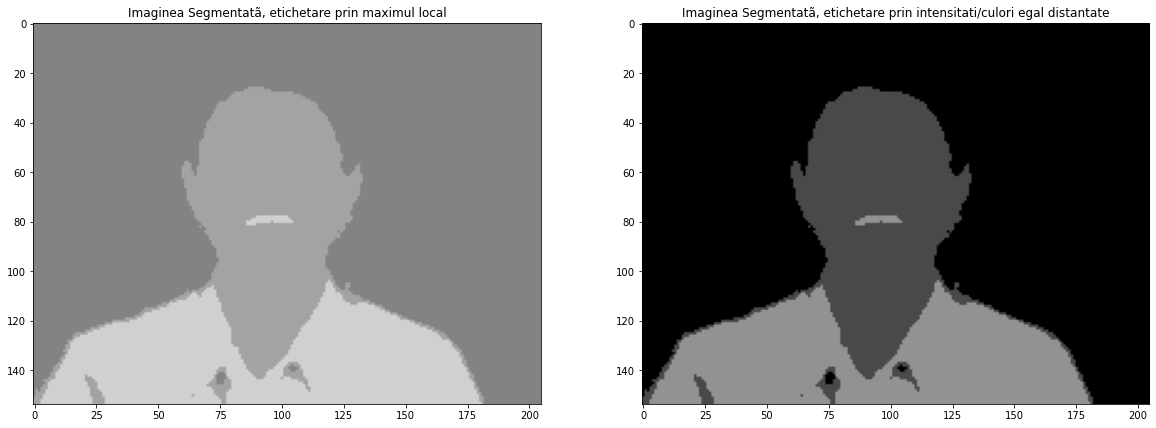

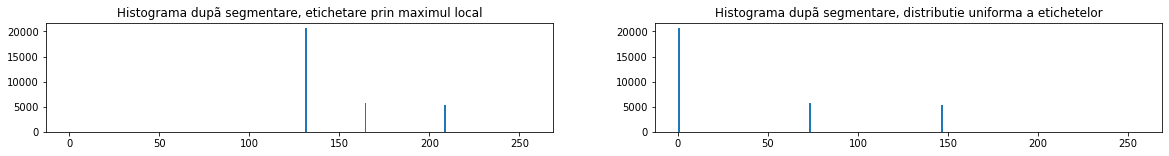

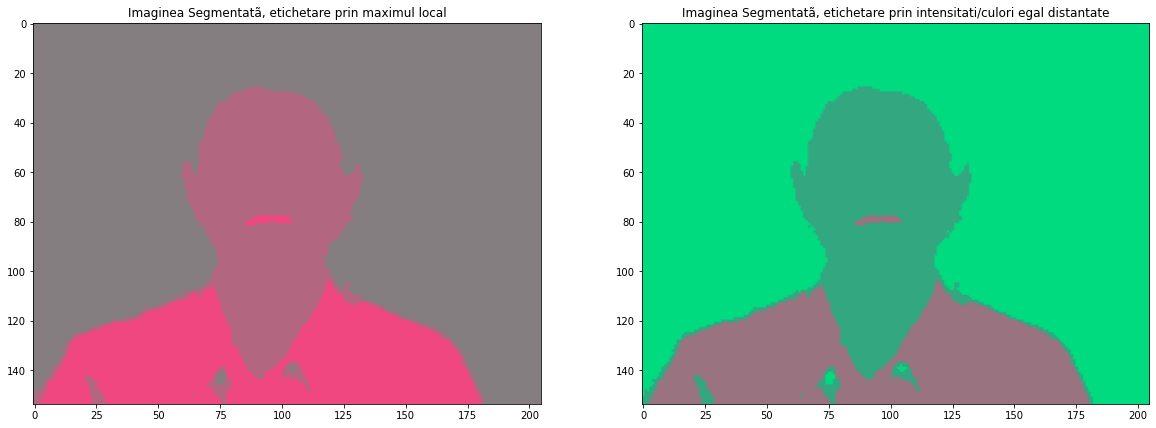

In [24]:
# Selectare imagine pe care testam aplicatia
# Se recomanda sa se pastreze imgsPath = "D:/_TestImages" - fiind directorul 
#       principal care contine subdirectoarele cu imaginile sugerate
# La setare imgName se specifica si subdirectorul din care dace parte imaginea
imgsPath = "/Users/galoscar07/Documents/master2k20-2k22/2nd Semester/SIAI/Laborator/_TestImages" 
imgName = 'ImgTstSegmFaciale/face01.jpg' # atentie sa fie scris corect numele imaginii!!!!
imgFile = os.path.sep.join([imgsPath, imgName])
#imgName = 'Kodak/kodim23.png'
# Sugestie imagini pentru testare (dir/ imgs):
#  ImgTstSegmGen: kronenburg-rose-closeup.jpg; roses.jpg; rose021.jpg
#  ImgTstSegmFaciale: la alegere 5 imagini - scop: segmentare zona piele intr-o singura clasa
#  ImgTstSegmBoard:   board3.bmp; board7.bmp; - scop: segmentare pioni dupa culoare 

imgRGB = CitireAfisareImagine(imgFile)

ColorSpacesList = ['R/G/B', 'Y/Cr/Cb', 'H/S/V', 'L/a/b', 'gray'] 

# Selectie spatiu de culoare in care se realizeaza operatia
#   Se selecteaza ca si o pozitie din vectorul ColorSpacesList
#   ColorSpacesList = ['RGB', 'YCrCb', 'HSV', 'Lab', 'gray']
#       0 - 'RGB' (nu se alege pentru a fi spatiu in care realizam procesarea), 
#       1 - 'YCrCb',      2 - 'HSV',           3 - 'Lab'
SelClrSp = 1 # se selecteaza ca si o pozitie din vectorul ColorSpacesList

ImgClrSp = ConversieAfisareImgColorSpace(imgRGB, SelClrSp)

# Selectie componenta pentru procesare 
#       se alege 0 pentru C0, 1 pentru C1 sau 2 pentru C2
# exemplu: YCrCb - 0=Y, 1=Cr, 2=Cb; HSV - 0=H, 1=S, 2=V; Lab - 0=L, 1=a, 2=b 
# Componenta Y, V sau L - sunt echivalentul imaginii pe nivele de gri
ClrCompNr = 1; # se alege 0, 1 sau 2 pentru - C0, C1 sau C2

CompPr = ImgClrSp[:,:,ClrCompNr]; # extragere componenta pentru procesare 


# Setare parametrii pentru identificare optima a minimelor si maximelor locale
# Pas 1 - netezire/filtrare histrograma pentru eliminare zgomot (salturi datorate de zgomot)
# Pas 2 - localizare minime/ maxime 
#   FiltWindowLen - pentru filtrare mediana 1D a histogramei componentei procesate
#   MinMaxDif - distanta minima acceptata intre doua minime/maxime identificate
FiltWindowLen = 7; MinMaxDif = 15;

# Daca segmentarea nu este satisfăcătoare se vor modifica parametrii:
#    FiltWindowLen, MinMaxDif (urmarind si histograma componentei 
#       si daca exista posibilitatea de imbunatatire a rezultatului sau nu)

SegmentareComp(CompPr,FiltWindowLen, MinMaxDif, ColorSpacesList[SelClrSp] )